# **Computation of PPP Metrics for Control Run**

**Important metrics:**

- SH sea ice extent/volume
- regional sea ice extent/volume
- regional NPP, PCO2, SSS, SST
- gridpoint-level fields for sea ice concentration, SST, SSS, NPP, PCO2
- sea ice edge position (latitude at which sea ice concentration drops below 15%)

In [5]:
import os
import warnings
warnings.filterwarnings("ignore", message="invalid value encountered in true_divide")
warnings.filterwarnings("ignore", message="Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range")
warnings.filterwarnings("ignore", message="invalid value encountered in reduce")

import xarray as xr
import numpy as np
import math
import matplotlib.pyplot as plt

%load_ext autoreload
%autoreload 2
import hmei.processing as pcs
import hmei.visualization as vis

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [4]:
ds_sst = pcs.open_raw_ctrl('sst')

/local/projects/so_predict/esm2m_froelicher/CTRL/SST/sst_*.nc


In [22]:
write_rootdir = '/home/bbuchovecky/storage/so_predict_derived/'
reg_masks = xr.open_dataset(write_rootdir+'regional_global_masks.nc')

In [30]:
sst_reg_mean = []
for reg in reg_masks.data_vars:
    sst_reg_mean.append(pcs.reg_annual_mean(ds_sst, 'sst', masks=reg_masks, reg=reg) - 273.15)

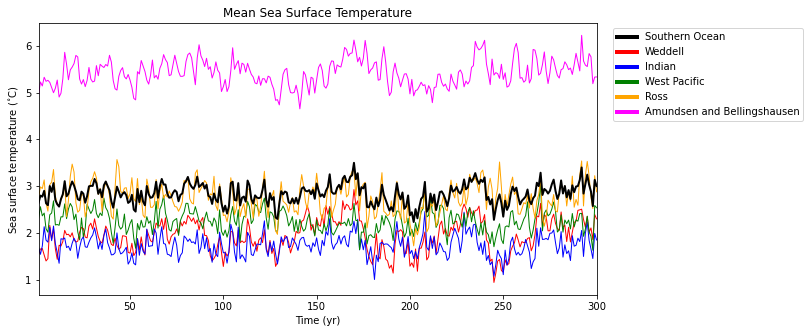

In [31]:
vis.ctrl_overlay_plot(sst_reg_mean, 'Mean Sea Surface Temperature', 'Sea surface temperature ($^{\circ}$C)')